In [2]:
import numpy as np
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import cv2

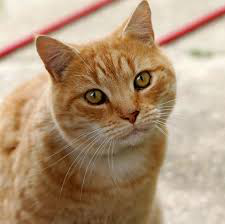

In [4]:
img = Image.open('static\img\img_now.jpg'); img

In [5]:
img_arr = np.asarray(img)

In [9]:
img_arr.shape

(224, 225, 3)

In [6]:
new_size = ((img_arr.shape[0] * 2),(img_arr.shape[1] * 2), img_arr.shape[2])

In [7]:
new_size

(448, 450, 3)

In [14]:
for i in range(2):
    print(i)

0
1


In [15]:
import image_processing as ip

In [17]:
ip.df(img)

AttributeError: 'JpegImageFile' object has no attribute 'shape'